In [1]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./sample_submission.csv
./train.csv
./pytorch-house.ipynb
./house.ipynb
./test.csv
./main.ipynb
./house-prices-advanced-regression-techniques.zip
./tf-house.ipynb
./data_description.txt
./.ipynb_checkpoints/pytorch-house-checkpoint.ipynb
./.ipynb_checkpoints/tf-house-checkpoint.ipynb
./.ipynb_checkpoints/main-checkpoint.py
./.ipynb_checkpoints/house-checkpoint.ipynb


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('./train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
cat ./data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
df=pd.read_csv('./train.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])

In [8]:
df.shape

(1460, 10)

In [9]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
SalePrice        0
dtype: int64

In [10]:
df['LotFrontage'].value_counts(dropna=False).sort_values()

144.0      1
106.0      1
150.0      1
137.0      1
46.0       1
        ... 
50.0      57
80.0      69
70.0      70
60.0     143
NaN      259
Name: LotFrontage, Length: 111, dtype: int64

In [11]:
df['LotFrontage'].fillna((df['LotFrontage'].mean()),inplace=True)

In [12]:
df['LotFrontage'].value_counts(dropna=False)

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
112.000000      1
138.000000      1
149.000000      1
38.000000       1
111.000000      1
Name: LotFrontage, Length: 111, dtype: int64

In [13]:
df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.000000,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.000000,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.000000,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.000000,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.000000,14260,Pave,IR1,2000,1145,1053,250000
5,50,RL,85.000000,14115,Pave,IR1,1993,796,566,143000
6,20,RL,75.000000,10084,Pave,Reg,2004,1694,0,307000
7,60,RL,70.049958,10382,Pave,IR1,1973,1107,983,200000
8,50,RM,51.000000,6120,Pave,Reg,1931,1022,752,129900
9,190,RL,50.000000,7420,Pave,Reg,1939,1077,0,118000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   object 
 2   LotFrontage  1460 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   LotShape     1460 non-null   object 
 6   YearBuilt    1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   2ndFlrSF     1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 114.2+ KB


In [15]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 111
Column name LotArea and unique values are 1073
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 753
Column name 2ndFlrSF and unique values are 417
Column name SalePrice and unique values are 663


In [16]:
# Today's date
import datetime
datetime.datetime.now().year

2021

In [17]:
# How old is the building.
df['Total Years']=datetime.datetime.now().year- df['YearBuilt']

In [18]:
df.drop("YearBuilt", axis= 1, inplace = True)

In [19]:
# Creating Categorical features.
categorical_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [20]:
# print the uniques value of each categorical_features.
print(df['MSSubClass'].unique(),
df['MSZoning'].unique(),
df['Street'].unique(),
df['LotShape'].unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] ['RL' 'RM' 'C (all)' 'FV' 'RH'] ['Pave' 'Grvl'] ['Reg' 'IR1' 'IR2' 'IR3']


In [21]:
# For example- Use label encoding for MSSubClass.
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
# label_encoder object knows how to understand word labels. 
lbl_encoders["MSSubClass"]=LabelEncoder()
# Encode labels in column 'MSSubclass'.
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [22]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [23]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
# Apply Label encoding for every faeature in categorical feature list.
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   int64  
 2   LotFrontage  1460 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   int64  
 5   LotShape     1460 non-null   int64  
 6   1stFlrSF     1460 non-null   int64  
 7   2ndFlrSF     1460 non-null   int64  
 8   SalePrice    1460 non-null   int64  
 9   Total Years  1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [25]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21


In [26]:
df['MSSubClass'].unique()

array([ 5,  0,  6,  4, 14,  3, 10, 11,  1,  9,  8, 12,  7, 13,  2])

In [27]:
import numpy as np
categorical_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
categorical_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [28]:
categorical_features.shape

(1460, 4)

In [29]:
import torch
categorical_features=torch.tensor(categorical_features,dtype=torch.int64)
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [30]:
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        # SalePrice is also included cause it is a dependent feature.
        # The pass statement in Python is used when a statement is required syntactically but you do not want any command or code to execute. The pass statement is a null operation; nothing happens when it executes.
        pass
    else:
        cont_features.append(i)

In [31]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [32]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [33]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [34]:
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [35]:
# Categorical dimension - the array contains no. of unique values for each feature.
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [36]:
embedding_dim= [(x, min(50, (x+1 ) // 2)) for x in cat_dims]

In [37]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# nn.Embedding - This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
# embedding layer 
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [39]:
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [40]:
# display.max_rows:
#       Displays the default number of value. Interpreter reads this value and displays the rows with this value as upper limit to display.
pd.set_option('display.max_rows', 500)
# Create a null list. It will store the indices of a value of columns of tensor. 
embedding_val=[]
# Here i represent the column of tensor. In categorical_feature each column represent its respective feature.
# 'e' coverts the input size of embedding layer to the require output size.
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for i,e in enumerate(embed_representation):
    print(i,e)
    embedding_val.append(e(categorical_features[:,i]))

0 Embedding(15, 8)
1 Embedding(5, 3)
2 Embedding(2, 1)
3 Embedding(4, 2)


In [41]:
categorical_features[:,0]

tensor([5, 0, 5,  ..., 6, 0, 0])

In [42]:
 embedding_val

[tensor([[-1.1020,  0.3267, -1.3338,  ...,  1.9165, -1.7012, -0.7995],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661],
         [-1.1020,  0.3267, -1.3338,  ...,  1.9165, -1.7012, -0.7995],
         ...,
         [-1.1677,  0.6894,  0.0351,  ..., -1.4401,  1.2717, -0.8271],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         ...,
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.8492],
         [-1.8492],
         [-1.8492],
         ...,
         [-1.8492],
         [-1.8492],
         [-1.8492]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.1809,  0.5230],
         [-1.1809,  0.5230],
         [ 0.7417, -0.482

In [43]:
cat_featuresz=categorical_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [44]:
# Print the embedded values.
embedding_val

[tensor([[-1.1020,  0.3267, -1.3338,  ...,  1.9165, -1.7012, -0.7995],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661],
         [-1.1020,  0.3267, -1.3338,  ...,  1.9165, -1.7012, -0.7995],
         ...,
         [-1.1677,  0.6894,  0.0351,  ..., -1.4401,  1.2717, -0.8271],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661],
         [-0.4325, -0.3338,  1.1293,  ...,  0.2488, -0.6429, -1.4661]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         ...,
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037],
         [-2.6892,  0.8795, -1.4037]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.8492],
         [-1.8492],
         [-1.8492],
         ...,
         [-1.8492],
         [-1.8492],
         [-1.8492]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.1809,  0.5230],
         [-1.1809,  0.5230],
         [ 0.7417, -0.482

In [45]:
# Arrange the 4 tensors in one tensor in 4 column. Concatenating the 4 tensors.
z = torch.cat(embedding_val, 1)
z

tensor([[-1.1020,  0.3267, -1.3338,  ..., -1.8492, -1.1809,  0.5230],
        [-0.4325, -0.3338,  1.1293,  ..., -1.8492, -1.1809,  0.5230],
        [-1.1020,  0.3267, -1.3338,  ..., -1.8492,  0.7417, -0.4829],
        ...,
        [-1.1677,  0.6894,  0.0351,  ..., -1.8492, -1.1809,  0.5230],
        [-0.4325, -0.3338,  1.1293,  ..., -1.8492, -1.1809,  0.5230],
        [-0.4325, -0.3338,  1.1293,  ..., -1.8492, -1.1809,  0.5230]],
       grad_fn=<CatBackward>)

In [46]:
# Implement dropupout
droput=nn.Dropout(.4)

In [47]:
# Perform the dropout on concatenated tensor i.e z
final_embed=droput(z)
final_embed

tensor([[-1.8366,  0.5446, -0.0000,  ..., -3.0820, -1.9682,  0.8717],
        [-0.7209, -0.0000,  0.0000,  ..., -3.0820, -1.9682,  0.8717],
        [-1.8366,  0.5446, -2.2230,  ..., -3.0820,  1.2362, -0.0000],
        ...,
        [-1.9461,  0.0000,  0.0585,  ..., -3.0820, -1.9682,  0.0000],
        [-0.0000, -0.0000,  1.8822,  ..., -0.0000, -0.0000,  0.8717],
        [-0.7209, -0.5564,  0.0000,  ..., -0.0000, -0.0000,  0.0000]],
       grad_fn=<MulBackward0>)

In [48]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
# Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define a class for model.
class FeedForwardNN(nn.Module):
    
    # function contains embedding dimension, no. of continuous values, output, layers and dropout value.
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        # Create a module list for embedding layers.
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        # n_emb = embedding dimension, n_cont = no.of continuous values.
        n_emb = sum((out for inp,out in embedding_dim))
        # n_in = input.
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            # Since our input is a 1D array we will use BatchNorm1d class present in the Pytorch nn module.
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        # emedding the categorical features.
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [50]:
torch.manual_seed(100)
# h1 = 100 neurons , h2 = 50 neurons
model=FeedForwardNN(embedding_dim,len(cont_features),1,[ 100,50],p=0.1).to(DEVICE)

In [51]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [52]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [53]:
# train and test split
batch_size=1200
# take 15 % of of train data as test data.
test_size=int(batch_size*0.15)
train_categorical=categorical_features[:batch_size-test_size].to(DEVICE)
test_categorical=categorical_features[batch_size-test_size:batch_size].to(DEVICE)
train_cont=cont_values[:batch_size-test_size].to(DEVICE)
test_cont=cont_values[batch_size-test_size:batch_size].to(DEVICE)
y_train=y[:batch_size-test_size].to(DEVICE)
y_test=y[batch_size-test_size:batch_size].to(DEVICE)

In [54]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [55]:
import torch.nn as nn
#import pdb
#pdb.set_trace()
epochs= 5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train))### RMSE
    print(loss)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    #clear old gradient from the last step.
    optimizer.zero_grad()
    # compute the derivative of the loss w.r.t parameter 
    loss.backward()
    # step() updates the parameters
    optimizer.step()

tensor(198494.8750, grad_fn=<SqrtBackward>)
Epoch number: 1 and the loss : 198494.875
tensor(198494.3438, grad_fn=<SqrtBackward>)
tensor(198494., grad_fn=<SqrtBackward>)
tensor(198493.7031, grad_fn=<SqrtBackward>)
tensor(198493.4375, grad_fn=<SqrtBackward>)
tensor(198493.1406, grad_fn=<SqrtBackward>)
tensor(198492.8125, grad_fn=<SqrtBackward>)
tensor(198492.5312, grad_fn=<SqrtBackward>)
tensor(198492.1875, grad_fn=<SqrtBackward>)
tensor(198491.8906, grad_fn=<SqrtBackward>)
tensor(198491.6406, grad_fn=<SqrtBackward>)
Epoch number: 11 and the loss : 198491.640625
tensor(198491.2188, grad_fn=<SqrtBackward>)
tensor(198490.7969, grad_fn=<SqrtBackward>)
tensor(198490.4531, grad_fn=<SqrtBackward>)
tensor(198490.0938, grad_fn=<SqrtBackward>)
tensor(198489.6719, grad_fn=<SqrtBackward>)
tensor(198489.2500, grad_fn=<SqrtBackward>)
tensor(198488.7344, grad_fn=<SqrtBackward>)
tensor(198488.2188, grad_fn=<SqrtBackward>)
tensor(198487.8594, grad_fn=<SqrtBackward>)
tensor(198487.2656, grad_fn=<SqrtBac

tensor(198031.0938, grad_fn=<SqrtBackward>)
tensor(198024.5156, grad_fn=<SqrtBackward>)
tensor(198016.3906, grad_fn=<SqrtBackward>)
tensor(198010.0312, grad_fn=<SqrtBackward>)
tensor(198007.3281, grad_fn=<SqrtBackward>)
tensor(198001.1406, grad_fn=<SqrtBackward>)
Epoch number: 181 and the loss : 198001.140625
tensor(197992.6875, grad_fn=<SqrtBackward>)
tensor(197987.1250, grad_fn=<SqrtBackward>)
tensor(197979.9531, grad_fn=<SqrtBackward>)
tensor(197976.1719, grad_fn=<SqrtBackward>)
tensor(197972.2344, grad_fn=<SqrtBackward>)
tensor(197964.1094, grad_fn=<SqrtBackward>)
tensor(197961.6094, grad_fn=<SqrtBackward>)
tensor(197952.9375, grad_fn=<SqrtBackward>)
tensor(197947.0312, grad_fn=<SqrtBackward>)
tensor(197936.5156, grad_fn=<SqrtBackward>)
Epoch number: 191 and the loss : 197936.515625
tensor(197938.5156, grad_fn=<SqrtBackward>)
tensor(197929.7500, grad_fn=<SqrtBackward>)
tensor(197924., grad_fn=<SqrtBackward>)
tensor(197918.5781, grad_fn=<SqrtBackward>)
tensor(197907.2812, grad_fn=<S

tensor(196490.3125, grad_fn=<SqrtBackward>)
tensor(196477.4844, grad_fn=<SqrtBackward>)
tensor(196458.1562, grad_fn=<SqrtBackward>)
tensor(196446.2812, grad_fn=<SqrtBackward>)
tensor(196436.8906, grad_fn=<SqrtBackward>)
tensor(196419.6094, grad_fn=<SqrtBackward>)
tensor(196415.8594, grad_fn=<SqrtBackward>)
tensor(196404.0312, grad_fn=<SqrtBackward>)
tensor(196387.7656, grad_fn=<SqrtBackward>)
tensor(196374.5938, grad_fn=<SqrtBackward>)
Epoch number: 361 and the loss : 196374.59375
tensor(196367.8750, grad_fn=<SqrtBackward>)
tensor(196360.5312, grad_fn=<SqrtBackward>)
tensor(196337.7500, grad_fn=<SqrtBackward>)
tensor(196332.8750, grad_fn=<SqrtBackward>)
tensor(196321.2969, grad_fn=<SqrtBackward>)
tensor(196316.2812, grad_fn=<SqrtBackward>)
tensor(196299.7344, grad_fn=<SqrtBackward>)
tensor(196289.7344, grad_fn=<SqrtBackward>)
tensor(196263.0469, grad_fn=<SqrtBackward>)
tensor(196263.3906, grad_fn=<SqrtBackward>)
Epoch number: 371 and the loss : 196263.390625
tensor(196242.7344, grad_fn

tensor(193967.3281, grad_fn=<SqrtBackward>)
tensor(193945.2031, grad_fn=<SqrtBackward>)
tensor(193912.5000, grad_fn=<SqrtBackward>)
tensor(193903.9844, grad_fn=<SqrtBackward>)
tensor(193878.2812, grad_fn=<SqrtBackward>)
tensor(193901.5000, grad_fn=<SqrtBackward>)
tensor(193876.0312, grad_fn=<SqrtBackward>)
tensor(193827.8125, grad_fn=<SqrtBackward>)
Epoch number: 531 and the loss : 193827.8125
tensor(193817.1406, grad_fn=<SqrtBackward>)
tensor(193820.1094, grad_fn=<SqrtBackward>)
tensor(193783.4062, grad_fn=<SqrtBackward>)
tensor(193768.8594, grad_fn=<SqrtBackward>)
tensor(193757.9844, grad_fn=<SqrtBackward>)
tensor(193758.0938, grad_fn=<SqrtBackward>)
tensor(193691.8906, grad_fn=<SqrtBackward>)
tensor(193712.3125, grad_fn=<SqrtBackward>)
tensor(193681.1094, grad_fn=<SqrtBackward>)
tensor(193671.7500, grad_fn=<SqrtBackward>)
Epoch number: 541 and the loss : 193671.75
tensor(193653.2656, grad_fn=<SqrtBackward>)
tensor(193604.6406, grad_fn=<SqrtBackward>)
tensor(193602.2500, grad_fn=<Sqr

tensor(190423.7031, grad_fn=<SqrtBackward>)
tensor(190420.9219, grad_fn=<SqrtBackward>)
tensor(190431.0469, grad_fn=<SqrtBackward>)
Epoch number: 701 and the loss : 190431.046875
tensor(190370.7812, grad_fn=<SqrtBackward>)
tensor(190373.4844, grad_fn=<SqrtBackward>)
tensor(190314.0312, grad_fn=<SqrtBackward>)
tensor(190344.7969, grad_fn=<SqrtBackward>)
tensor(190325.5156, grad_fn=<SqrtBackward>)
tensor(190255.1406, grad_fn=<SqrtBackward>)
tensor(190223.6875, grad_fn=<SqrtBackward>)
tensor(190200.7188, grad_fn=<SqrtBackward>)
tensor(190178.0625, grad_fn=<SqrtBackward>)
tensor(190155.8125, grad_fn=<SqrtBackward>)
Epoch number: 711 and the loss : 190155.8125
tensor(190158.3281, grad_fn=<SqrtBackward>)
tensor(190165.3750, grad_fn=<SqrtBackward>)
tensor(190125.1406, grad_fn=<SqrtBackward>)
tensor(190055.7500, grad_fn=<SqrtBackward>)
tensor(190088.7500, grad_fn=<SqrtBackward>)
tensor(190009.2812, grad_fn=<SqrtBackward>)
tensor(190021.8125, grad_fn=<SqrtBackward>)
tensor(190013.6250, grad_fn=

tensor(186214.8438, grad_fn=<SqrtBackward>)
Epoch number: 871 and the loss : 186214.84375
tensor(186189.7031, grad_fn=<SqrtBackward>)
tensor(186035.4219, grad_fn=<SqrtBackward>)
tensor(186095.3594, grad_fn=<SqrtBackward>)
tensor(186100.9219, grad_fn=<SqrtBackward>)
tensor(186046.5625, grad_fn=<SqrtBackward>)
tensor(185972.8594, grad_fn=<SqrtBackward>)
tensor(185981.3438, grad_fn=<SqrtBackward>)
tensor(185970., grad_fn=<SqrtBackward>)
tensor(185879.2812, grad_fn=<SqrtBackward>)
tensor(185917.9375, grad_fn=<SqrtBackward>)
Epoch number: 881 and the loss : 185917.9375
tensor(185873.1094, grad_fn=<SqrtBackward>)
tensor(185820.9531, grad_fn=<SqrtBackward>)
tensor(185771.2031, grad_fn=<SqrtBackward>)
tensor(185722.6562, grad_fn=<SqrtBackward>)
tensor(185736.9375, grad_fn=<SqrtBackward>)
tensor(185746.9375, grad_fn=<SqrtBackward>)
tensor(185727.7031, grad_fn=<SqrtBackward>)
tensor(185706.2500, grad_fn=<SqrtBackward>)
tensor(185629.8906, grad_fn=<SqrtBackward>)
tensor(185602.0938, grad_fn=<Sqrt

tensor(180948.3750, grad_fn=<SqrtBackward>)
tensor(180951.2344, grad_fn=<SqrtBackward>)
tensor(180972.1562, grad_fn=<SqrtBackward>)
tensor(180804.6719, grad_fn=<SqrtBackward>)
tensor(180852.4375, grad_fn=<SqrtBackward>)
tensor(180870.1250, grad_fn=<SqrtBackward>)
Epoch number: 1051 and the loss : 180870.125
tensor(180849.8281, grad_fn=<SqrtBackward>)
tensor(180687.1406, grad_fn=<SqrtBackward>)
tensor(180648.7656, grad_fn=<SqrtBackward>)
tensor(180658.7188, grad_fn=<SqrtBackward>)
tensor(180603.5625, grad_fn=<SqrtBackward>)
tensor(180636.0781, grad_fn=<SqrtBackward>)
tensor(180654.4062, grad_fn=<SqrtBackward>)
tensor(180532.9531, grad_fn=<SqrtBackward>)
tensor(180537.8906, grad_fn=<SqrtBackward>)
tensor(180491.1719, grad_fn=<SqrtBackward>)
Epoch number: 1061 and the loss : 180491.171875
tensor(180494.4688, grad_fn=<SqrtBackward>)
tensor(180420.3281, grad_fn=<SqrtBackward>)
tensor(180442.1562, grad_fn=<SqrtBackward>)
tensor(180445.3594, grad_fn=<SqrtBackward>)
tensor(180292.5156, grad_fn

tensor(175136.9844, grad_fn=<SqrtBackward>)
Epoch number: 1221 and the loss : 175136.984375
tensor(175013.6406, grad_fn=<SqrtBackward>)
tensor(175035.2812, grad_fn=<SqrtBackward>)
tensor(175060.9844, grad_fn=<SqrtBackward>)
tensor(174926.9219, grad_fn=<SqrtBackward>)
tensor(174848.1406, grad_fn=<SqrtBackward>)
tensor(174916.2656, grad_fn=<SqrtBackward>)
tensor(174909.8594, grad_fn=<SqrtBackward>)
tensor(174867.4531, grad_fn=<SqrtBackward>)
tensor(174761.0469, grad_fn=<SqrtBackward>)
tensor(174657.0469, grad_fn=<SqrtBackward>)
Epoch number: 1231 and the loss : 174657.046875
tensor(174683.8281, grad_fn=<SqrtBackward>)
tensor(174569.7344, grad_fn=<SqrtBackward>)
tensor(174589.9688, grad_fn=<SqrtBackward>)
tensor(174659.9375, grad_fn=<SqrtBackward>)
tensor(174687.8438, grad_fn=<SqrtBackward>)
tensor(174530.3125, grad_fn=<SqrtBackward>)
tensor(174539.1719, grad_fn=<SqrtBackward>)
tensor(174348.1250, grad_fn=<SqrtBackward>)
tensor(174432.4219, grad_fn=<SqrtBackward>)
tensor(174457.7500, grad

tensor(168337.0938, grad_fn=<SqrtBackward>)
Epoch number: 1401 and the loss : 168337.09375
tensor(168255.8281, grad_fn=<SqrtBackward>)
tensor(168257.3750, grad_fn=<SqrtBackward>)
tensor(168228.8594, grad_fn=<SqrtBackward>)
tensor(168143., grad_fn=<SqrtBackward>)
tensor(168215.8438, grad_fn=<SqrtBackward>)
tensor(168056.6094, grad_fn=<SqrtBackward>)
tensor(168130.6406, grad_fn=<SqrtBackward>)
tensor(167939.9688, grad_fn=<SqrtBackward>)
tensor(167941.8750, grad_fn=<SqrtBackward>)
tensor(167956.9062, grad_fn=<SqrtBackward>)
Epoch number: 1411 and the loss : 167956.90625
tensor(168051.3281, grad_fn=<SqrtBackward>)
tensor(167938.2031, grad_fn=<SqrtBackward>)
tensor(167818.2344, grad_fn=<SqrtBackward>)
tensor(167721.2656, grad_fn=<SqrtBackward>)
tensor(167858.7656, grad_fn=<SqrtBackward>)
tensor(167700.0469, grad_fn=<SqrtBackward>)
tensor(167658.1875, grad_fn=<SqrtBackward>)
tensor(167643.8750, grad_fn=<SqrtBackward>)
tensor(167566.4688, grad_fn=<SqrtBackward>)
tensor(167689.4219, grad_fn=<S

tensor(161130.5938, grad_fn=<SqrtBackward>)
tensor(161345.7969, grad_fn=<SqrtBackward>)
tensor(160997.2812, grad_fn=<SqrtBackward>)
tensor(161112.4062, grad_fn=<SqrtBackward>)
tensor(160915.2812, grad_fn=<SqrtBackward>)
Epoch number: 1581 and the loss : 160915.28125
tensor(160855.5469, grad_fn=<SqrtBackward>)
tensor(160907.0625, grad_fn=<SqrtBackward>)
tensor(160922.3125, grad_fn=<SqrtBackward>)
tensor(160895.9688, grad_fn=<SqrtBackward>)
tensor(160755.7344, grad_fn=<SqrtBackward>)
tensor(160797.3125, grad_fn=<SqrtBackward>)
tensor(160591.0625, grad_fn=<SqrtBackward>)
tensor(160581.6406, grad_fn=<SqrtBackward>)
tensor(160683.6719, grad_fn=<SqrtBackward>)
tensor(160494.5156, grad_fn=<SqrtBackward>)
Epoch number: 1591 and the loss : 160494.515625
tensor(160704.8281, grad_fn=<SqrtBackward>)
tensor(160451.4375, grad_fn=<SqrtBackward>)
tensor(160415.6562, grad_fn=<SqrtBackward>)
tensor(160662.8125, grad_fn=<SqrtBackward>)
tensor(160380.5625, grad_fn=<SqrtBackward>)
tensor(160218.8438, grad_

tensor(153643.2031, grad_fn=<SqrtBackward>)
tensor(153619.9219, grad_fn=<SqrtBackward>)
tensor(153463.3906, grad_fn=<SqrtBackward>)
tensor(153595.0781, grad_fn=<SqrtBackward>)
tensor(153623.4688, grad_fn=<SqrtBackward>)
tensor(153491.7969, grad_fn=<SqrtBackward>)
Epoch number: 1751 and the loss : 153491.796875
tensor(153508.6875, grad_fn=<SqrtBackward>)
tensor(153522.5781, grad_fn=<SqrtBackward>)
tensor(153456.9375, grad_fn=<SqrtBackward>)
tensor(153383.1562, grad_fn=<SqrtBackward>)
tensor(153410., grad_fn=<SqrtBackward>)
tensor(153361.5938, grad_fn=<SqrtBackward>)
tensor(153198.1875, grad_fn=<SqrtBackward>)
tensor(152993.6406, grad_fn=<SqrtBackward>)
tensor(153075.7969, grad_fn=<SqrtBackward>)
tensor(153000.0312, grad_fn=<SqrtBackward>)
Epoch number: 1761 and the loss : 153000.03125
tensor(153039.2500, grad_fn=<SqrtBackward>)
tensor(153028., grad_fn=<SqrtBackward>)
tensor(152929.6719, grad_fn=<SqrtBackward>)
tensor(152721.3906, grad_fn=<SqrtBackward>)
tensor(152927.6406, grad_fn=<Sqrt

tensor(146017.1562, grad_fn=<SqrtBackward>)
tensor(146004.0781, grad_fn=<SqrtBackward>)
tensor(145838.3281, grad_fn=<SqrtBackward>)
tensor(145827.5469, grad_fn=<SqrtBackward>)
tensor(145553.6562, grad_fn=<SqrtBackward>)
tensor(145572.5000, grad_fn=<SqrtBackward>)
Epoch number: 1921 and the loss : 145572.5
tensor(145904.7344, grad_fn=<SqrtBackward>)
tensor(145591.8438, grad_fn=<SqrtBackward>)
tensor(145498.1250, grad_fn=<SqrtBackward>)
tensor(145513.3594, grad_fn=<SqrtBackward>)
tensor(145394.5000, grad_fn=<SqrtBackward>)
tensor(145204.7812, grad_fn=<SqrtBackward>)
tensor(145545.7969, grad_fn=<SqrtBackward>)
tensor(145357.0781, grad_fn=<SqrtBackward>)
tensor(145102.1250, grad_fn=<SqrtBackward>)
tensor(144909.6094, grad_fn=<SqrtBackward>)
Epoch number: 1931 and the loss : 144909.609375
tensor(145132.9062, grad_fn=<SqrtBackward>)
tensor(145231.0312, grad_fn=<SqrtBackward>)
tensor(144994.2500, grad_fn=<SqrtBackward>)
tensor(145199.5000, grad_fn=<SqrtBackward>)
tensor(145119.7031, grad_fn=<

tensor(137674.2344, grad_fn=<SqrtBackward>)
tensor(137274.8594, grad_fn=<SqrtBackward>)
Epoch number: 2091 and the loss : 137274.859375
tensor(137384.6875, grad_fn=<SqrtBackward>)
tensor(137127.5312, grad_fn=<SqrtBackward>)
tensor(137457.0312, grad_fn=<SqrtBackward>)
tensor(137235.3281, grad_fn=<SqrtBackward>)
tensor(137513.3125, grad_fn=<SqrtBackward>)
tensor(137445.8281, grad_fn=<SqrtBackward>)
tensor(136975.5312, grad_fn=<SqrtBackward>)
tensor(137198.6250, grad_fn=<SqrtBackward>)
tensor(137081.9375, grad_fn=<SqrtBackward>)
tensor(137046.6562, grad_fn=<SqrtBackward>)
Epoch number: 2101 and the loss : 137046.65625
tensor(136874.2188, grad_fn=<SqrtBackward>)
tensor(136981.9219, grad_fn=<SqrtBackward>)
tensor(136997.3438, grad_fn=<SqrtBackward>)
tensor(136892.2344, grad_fn=<SqrtBackward>)
tensor(136674.0469, grad_fn=<SqrtBackward>)
tensor(136781.6406, grad_fn=<SqrtBackward>)
tensor(136653.7188, grad_fn=<SqrtBackward>)
tensor(136542.4219, grad_fn=<SqrtBackward>)
tensor(136516.0156, grad_

tensor(129086.6562, grad_fn=<SqrtBackward>)
tensor(129099.4844, grad_fn=<SqrtBackward>)
tensor(128958.7812, grad_fn=<SqrtBackward>)
tensor(128903.2109, grad_fn=<SqrtBackward>)
tensor(128799.3203, grad_fn=<SqrtBackward>)
tensor(129429.3750, grad_fn=<SqrtBackward>)
tensor(128743.6484, grad_fn=<SqrtBackward>)
tensor(128669.7344, grad_fn=<SqrtBackward>)
tensor(128377.3281, grad_fn=<SqrtBackward>)
tensor(128485.7188, grad_fn=<SqrtBackward>)
Epoch number: 2271 and the loss : 128485.71875
tensor(128844.7031, grad_fn=<SqrtBackward>)
tensor(128493.1172, grad_fn=<SqrtBackward>)
tensor(128460.8438, grad_fn=<SqrtBackward>)
tensor(128495.5781, grad_fn=<SqrtBackward>)
tensor(128164.6953, grad_fn=<SqrtBackward>)
tensor(128251.6641, grad_fn=<SqrtBackward>)
tensor(128226.6016, grad_fn=<SqrtBackward>)
tensor(127961.7109, grad_fn=<SqrtBackward>)
tensor(127990.3047, grad_fn=<SqrtBackward>)
tensor(128013.1719, grad_fn=<SqrtBackward>)
Epoch number: 2281 and the loss : 128013.171875
tensor(128092.8438, grad_

tensor(120450.8984, grad_fn=<SqrtBackward>)
tensor(120381.2656, grad_fn=<SqrtBackward>)
tensor(120432.9844, grad_fn=<SqrtBackward>)
tensor(120029.7734, grad_fn=<SqrtBackward>)
tensor(120116.3047, grad_fn=<SqrtBackward>)
tensor(119865.8750, grad_fn=<SqrtBackward>)
Epoch number: 2441 and the loss : 119865.875
tensor(119943.4531, grad_fn=<SqrtBackward>)
tensor(120124.5234, grad_fn=<SqrtBackward>)
tensor(119822.8359, grad_fn=<SqrtBackward>)
tensor(119602.4297, grad_fn=<SqrtBackward>)
tensor(119922.5547, grad_fn=<SqrtBackward>)
tensor(119656.0391, grad_fn=<SqrtBackward>)
tensor(119218.5156, grad_fn=<SqrtBackward>)
tensor(119158.8203, grad_fn=<SqrtBackward>)
tensor(119349.9844, grad_fn=<SqrtBackward>)
tensor(119643.2109, grad_fn=<SqrtBackward>)
Epoch number: 2451 and the loss : 119643.2109375
tensor(119264.3516, grad_fn=<SqrtBackward>)
tensor(119802.9609, grad_fn=<SqrtBackward>)
tensor(119696.8672, grad_fn=<SqrtBackward>)
tensor(119287.6094, grad_fn=<SqrtBackward>)
tensor(119654.4922, grad_f

tensor(111345.1016, grad_fn=<SqrtBackward>)
tensor(110984.7734, grad_fn=<SqrtBackward>)
tensor(111073.5078, grad_fn=<SqrtBackward>)
tensor(111260.8750, grad_fn=<SqrtBackward>)
tensor(111130.4531, grad_fn=<SqrtBackward>)
tensor(111090.4922, grad_fn=<SqrtBackward>)
tensor(110852.4688, grad_fn=<SqrtBackward>)
tensor(111001.2734, grad_fn=<SqrtBackward>)
tensor(110728.8516, grad_fn=<SqrtBackward>)
Epoch number: 2621 and the loss : 110728.8515625
tensor(111034.8047, grad_fn=<SqrtBackward>)
tensor(110667.2188, grad_fn=<SqrtBackward>)
tensor(110423.1875, grad_fn=<SqrtBackward>)
tensor(110555.2734, grad_fn=<SqrtBackward>)
tensor(110356.0312, grad_fn=<SqrtBackward>)
tensor(110425.5312, grad_fn=<SqrtBackward>)
tensor(110547.9922, grad_fn=<SqrtBackward>)
tensor(110464.6641, grad_fn=<SqrtBackward>)
tensor(110367.8438, grad_fn=<SqrtBackward>)
tensor(110580.2734, grad_fn=<SqrtBackward>)
Epoch number: 2631 and the loss : 110580.2734375
tensor(109887.9531, grad_fn=<SqrtBackward>)
tensor(110319.6562, gr

tensor(102213.0547, grad_fn=<SqrtBackward>)
Epoch number: 2791 and the loss : 102213.0546875
tensor(101969.4297, grad_fn=<SqrtBackward>)
tensor(101788.0547, grad_fn=<SqrtBackward>)
tensor(102148.5625, grad_fn=<SqrtBackward>)
tensor(102139.9141, grad_fn=<SqrtBackward>)
tensor(102004.6953, grad_fn=<SqrtBackward>)
tensor(101637.6875, grad_fn=<SqrtBackward>)
tensor(101792.0938, grad_fn=<SqrtBackward>)
tensor(102153.1641, grad_fn=<SqrtBackward>)
tensor(101713.9297, grad_fn=<SqrtBackward>)
tensor(101301.6641, grad_fn=<SqrtBackward>)
Epoch number: 2801 and the loss : 101301.6640625
tensor(102028.8203, grad_fn=<SqrtBackward>)
tensor(101448.3281, grad_fn=<SqrtBackward>)
tensor(101404.6016, grad_fn=<SqrtBackward>)
tensor(101774.0703, grad_fn=<SqrtBackward>)
tensor(101448.4609, grad_fn=<SqrtBackward>)
tensor(101261.4453, grad_fn=<SqrtBackward>)
tensor(101380.9609, grad_fn=<SqrtBackward>)
tensor(101176.6953, grad_fn=<SqrtBackward>)
tensor(101175.2188, grad_fn=<SqrtBackward>)
tensor(101237.9219, gr

tensor(93159.8438, grad_fn=<SqrtBackward>)
tensor(93208.4375, grad_fn=<SqrtBackward>)
tensor(93093.3750, grad_fn=<SqrtBackward>)
tensor(93206.0781, grad_fn=<SqrtBackward>)
tensor(93025.1094, grad_fn=<SqrtBackward>)
tensor(93275.5156, grad_fn=<SqrtBackward>)
tensor(93146.4219, grad_fn=<SqrtBackward>)
Epoch number: 2971 and the loss : 93146.421875
tensor(93278.0703, grad_fn=<SqrtBackward>)
tensor(93112.9609, grad_fn=<SqrtBackward>)
tensor(92895.2109, grad_fn=<SqrtBackward>)
tensor(92786.0078, grad_fn=<SqrtBackward>)
tensor(93052.9688, grad_fn=<SqrtBackward>)
tensor(92743.0703, grad_fn=<SqrtBackward>)
tensor(92353.1875, grad_fn=<SqrtBackward>)
tensor(92656.1016, grad_fn=<SqrtBackward>)
tensor(92419.7031, grad_fn=<SqrtBackward>)
tensor(92595.5703, grad_fn=<SqrtBackward>)
Epoch number: 2981 and the loss : 92595.5703125
tensor(92033.4219, grad_fn=<SqrtBackward>)
tensor(92451.4219, grad_fn=<SqrtBackward>)
tensor(92137.3828, grad_fn=<SqrtBackward>)
tensor(92579.5312, grad_fn=<SqrtBackward>)
te

tensor(84018.0703, grad_fn=<SqrtBackward>)
tensor(84050.7812, grad_fn=<SqrtBackward>)
tensor(84359.5625, grad_fn=<SqrtBackward>)
tensor(84504.1094, grad_fn=<SqrtBackward>)
Epoch number: 3141 and the loss : 84504.109375
tensor(83969.1562, grad_fn=<SqrtBackward>)
tensor(83795.2969, grad_fn=<SqrtBackward>)
tensor(84296.9766, grad_fn=<SqrtBackward>)
tensor(83774.3984, grad_fn=<SqrtBackward>)
tensor(83766.8906, grad_fn=<SqrtBackward>)
tensor(84013.9297, grad_fn=<SqrtBackward>)
tensor(83863.7578, grad_fn=<SqrtBackward>)
tensor(83852.2891, grad_fn=<SqrtBackward>)
tensor(83544.4844, grad_fn=<SqrtBackward>)
tensor(83478.8125, grad_fn=<SqrtBackward>)
Epoch number: 3151 and the loss : 83478.8125
tensor(83224.5547, grad_fn=<SqrtBackward>)
tensor(83347.6719, grad_fn=<SqrtBackward>)
tensor(83401.1094, grad_fn=<SqrtBackward>)
tensor(83458.4453, grad_fn=<SqrtBackward>)
tensor(83239.4922, grad_fn=<SqrtBackward>)
tensor(83122.3516, grad_fn=<SqrtBackward>)
tensor(83088.3125, grad_fn=<SqrtBackward>)
tenso

tensor(74915.1094, grad_fn=<SqrtBackward>)
tensor(74946.7969, grad_fn=<SqrtBackward>)
tensor(75086.9531, grad_fn=<SqrtBackward>)
tensor(74708.3984, grad_fn=<SqrtBackward>)
tensor(74429.2891, grad_fn=<SqrtBackward>)
tensor(74601.6484, grad_fn=<SqrtBackward>)
tensor(74372.5234, grad_fn=<SqrtBackward>)
tensor(74609.8828, grad_fn=<SqrtBackward>)
tensor(74553.5000, grad_fn=<SqrtBackward>)
tensor(74728.9609, grad_fn=<SqrtBackward>)
Epoch number: 3321 and the loss : 74728.9609375
tensor(74415.0938, grad_fn=<SqrtBackward>)
tensor(74176.6406, grad_fn=<SqrtBackward>)
tensor(74296.9453, grad_fn=<SqrtBackward>)
tensor(74025.0391, grad_fn=<SqrtBackward>)
tensor(74003.1953, grad_fn=<SqrtBackward>)
tensor(73872.9141, grad_fn=<SqrtBackward>)
tensor(73848.4062, grad_fn=<SqrtBackward>)
tensor(74485.9766, grad_fn=<SqrtBackward>)
tensor(74548.6328, grad_fn=<SqrtBackward>)
tensor(73213.1328, grad_fn=<SqrtBackward>)
Epoch number: 3331 and the loss : 73213.1328125
tensor(73939.9141, grad_fn=<SqrtBackward>)
t

tensor(65221.3945, grad_fn=<SqrtBackward>)
tensor(65589.0938, grad_fn=<SqrtBackward>)
tensor(64849.0195, grad_fn=<SqrtBackward>)
tensor(64882.0273, grad_fn=<SqrtBackward>)
tensor(64892.1641, grad_fn=<SqrtBackward>)
Epoch number: 3491 and the loss : 64892.1640625
tensor(65252.0234, grad_fn=<SqrtBackward>)
tensor(64669.9219, grad_fn=<SqrtBackward>)
tensor(64944.5430, grad_fn=<SqrtBackward>)
tensor(64421.6094, grad_fn=<SqrtBackward>)
tensor(64326.1250, grad_fn=<SqrtBackward>)
tensor(64697.2305, grad_fn=<SqrtBackward>)
tensor(64293.3398, grad_fn=<SqrtBackward>)
tensor(64535.7656, grad_fn=<SqrtBackward>)
tensor(64344.2773, grad_fn=<SqrtBackward>)
tensor(64393.7734, grad_fn=<SqrtBackward>)
Epoch number: 3501 and the loss : 64393.7734375
tensor(64691.7930, grad_fn=<SqrtBackward>)
tensor(64286.6289, grad_fn=<SqrtBackward>)
tensor(63679.6055, grad_fn=<SqrtBackward>)
tensor(64242.4023, grad_fn=<SqrtBackward>)
tensor(63647.0664, grad_fn=<SqrtBackward>)
tensor(64526.5742, grad_fn=<SqrtBackward>)
t

tensor(55618.1016, grad_fn=<SqrtBackward>)
tensor(54979.6445, grad_fn=<SqrtBackward>)
tensor(54936.6680, grad_fn=<SqrtBackward>)
tensor(54758.8867, grad_fn=<SqrtBackward>)
tensor(55327.2891, grad_fn=<SqrtBackward>)
tensor(54853.1719, grad_fn=<SqrtBackward>)
tensor(54931.8438, grad_fn=<SqrtBackward>)
tensor(55085.2500, grad_fn=<SqrtBackward>)
tensor(54945.2227, grad_fn=<SqrtBackward>)
tensor(54491.8359, grad_fn=<SqrtBackward>)
Epoch number: 3671 and the loss : 54491.8359375
tensor(54921.9883, grad_fn=<SqrtBackward>)
tensor(54655.3008, grad_fn=<SqrtBackward>)
tensor(54748.2656, grad_fn=<SqrtBackward>)
tensor(54381.5117, grad_fn=<SqrtBackward>)
tensor(55234.8594, grad_fn=<SqrtBackward>)
tensor(53982.5391, grad_fn=<SqrtBackward>)
tensor(54204.0234, grad_fn=<SqrtBackward>)
tensor(54143.5781, grad_fn=<SqrtBackward>)
tensor(54129.1641, grad_fn=<SqrtBackward>)
tensor(54145.8242, grad_fn=<SqrtBackward>)
Epoch number: 3681 and the loss : 54145.82421875
tensor(54415.2812, grad_fn=<SqrtBackward>)


tensor(46035.3008, grad_fn=<SqrtBackward>)
tensor(45348.6172, grad_fn=<SqrtBackward>)
tensor(45574.0312, grad_fn=<SqrtBackward>)
tensor(45937.5547, grad_fn=<SqrtBackward>)
tensor(45998.5352, grad_fn=<SqrtBackward>)
tensor(44999.4922, grad_fn=<SqrtBackward>)
tensor(45500.6172, grad_fn=<SqrtBackward>)
tensor(44896.3320, grad_fn=<SqrtBackward>)
Epoch number: 3841 and the loss : 44896.33203125
tensor(44986.8711, grad_fn=<SqrtBackward>)
tensor(45154.6953, grad_fn=<SqrtBackward>)
tensor(45327.8203, grad_fn=<SqrtBackward>)
tensor(44977.3398, grad_fn=<SqrtBackward>)
tensor(45249.7422, grad_fn=<SqrtBackward>)
tensor(45059.9023, grad_fn=<SqrtBackward>)
tensor(45044.8359, grad_fn=<SqrtBackward>)
tensor(45438.2305, grad_fn=<SqrtBackward>)
tensor(44731.6250, grad_fn=<SqrtBackward>)
tensor(45140.7383, grad_fn=<SqrtBackward>)
Epoch number: 3851 and the loss : 45140.73828125
tensor(45289.2070, grad_fn=<SqrtBackward>)
tensor(45326.0430, grad_fn=<SqrtBackward>)
tensor(45053.8867, grad_fn=<SqrtBackward>)

tensor(37121.4531, grad_fn=<SqrtBackward>)
Epoch number: 4011 and the loss : 37121.453125
tensor(37243.0977, grad_fn=<SqrtBackward>)
tensor(36299.2344, grad_fn=<SqrtBackward>)
tensor(36958.2461, grad_fn=<SqrtBackward>)
tensor(36228.2734, grad_fn=<SqrtBackward>)
tensor(36327.2930, grad_fn=<SqrtBackward>)
tensor(36674.1016, grad_fn=<SqrtBackward>)
tensor(35731.9141, grad_fn=<SqrtBackward>)
tensor(36478.8906, grad_fn=<SqrtBackward>)
tensor(35879.3438, grad_fn=<SqrtBackward>)
tensor(35576.4023, grad_fn=<SqrtBackward>)
Epoch number: 4021 and the loss : 35576.40234375
tensor(35616.7773, grad_fn=<SqrtBackward>)
tensor(36379.3789, grad_fn=<SqrtBackward>)
tensor(36149.2461, grad_fn=<SqrtBackward>)
tensor(36026.8203, grad_fn=<SqrtBackward>)
tensor(35700.4258, grad_fn=<SqrtBackward>)
tensor(35260.7852, grad_fn=<SqrtBackward>)
tensor(35631.1562, grad_fn=<SqrtBackward>)
tensor(36444.2109, grad_fn=<SqrtBackward>)
tensor(35742.5625, grad_fn=<SqrtBackward>)
tensor(35484.6680, grad_fn=<SqrtBackward>)
E

tensor(29053.0410, grad_fn=<SqrtBackward>)
tensor(29259.8828, grad_fn=<SqrtBackward>)
tensor(28551.2793, grad_fn=<SqrtBackward>)
tensor(29798.8262, grad_fn=<SqrtBackward>)
tensor(28822.9199, grad_fn=<SqrtBackward>)
Epoch number: 4191 and the loss : 28822.919921875
tensor(29242.0762, grad_fn=<SqrtBackward>)
tensor(28640.3262, grad_fn=<SqrtBackward>)
tensor(29263.0996, grad_fn=<SqrtBackward>)
tensor(28511.5859, grad_fn=<SqrtBackward>)
tensor(28574.7578, grad_fn=<SqrtBackward>)
tensor(28954.5039, grad_fn=<SqrtBackward>)
tensor(28267.5488, grad_fn=<SqrtBackward>)
tensor(29180.7773, grad_fn=<SqrtBackward>)
tensor(28804.3203, grad_fn=<SqrtBackward>)
tensor(27803., grad_fn=<SqrtBackward>)
Epoch number: 4201 and the loss : 27803.0
tensor(28328.3965, grad_fn=<SqrtBackward>)
tensor(27828.0566, grad_fn=<SqrtBackward>)
tensor(28236.3438, grad_fn=<SqrtBackward>)
tensor(27659.5371, grad_fn=<SqrtBackward>)
tensor(27927.2227, grad_fn=<SqrtBackward>)
tensor(28628.2539, grad_fn=<SqrtBackward>)
tensor(28

tensor(22894.9688, grad_fn=<SqrtBackward>)
tensor(23103.7246, grad_fn=<SqrtBackward>)
tensor(24178.1621, grad_fn=<SqrtBackward>)
Epoch number: 4361 and the loss : 24178.162109375
tensor(22935.3379, grad_fn=<SqrtBackward>)
tensor(23523.1934, grad_fn=<SqrtBackward>)
tensor(23411.5469, grad_fn=<SqrtBackward>)
tensor(23484.8418, grad_fn=<SqrtBackward>)
tensor(22609.1758, grad_fn=<SqrtBackward>)
tensor(22655.3711, grad_fn=<SqrtBackward>)
tensor(23219.3691, grad_fn=<SqrtBackward>)
tensor(22760.2363, grad_fn=<SqrtBackward>)
tensor(22317.1758, grad_fn=<SqrtBackward>)
tensor(22614.2617, grad_fn=<SqrtBackward>)
Epoch number: 4371 and the loss : 22614.26171875
tensor(23302.3242, grad_fn=<SqrtBackward>)
tensor(22497.4336, grad_fn=<SqrtBackward>)
tensor(22608.2070, grad_fn=<SqrtBackward>)
tensor(22439.4414, grad_fn=<SqrtBackward>)
tensor(22557.0566, grad_fn=<SqrtBackward>)
tensor(22637.8105, grad_fn=<SqrtBackward>)
tensor(23189.5762, grad_fn=<SqrtBackward>)
tensor(22732.4219, grad_fn=<SqrtBackward>

tensor(20624.5449, grad_fn=<SqrtBackward>)
Epoch number: 4531 and the loss : 20624.544921875
tensor(21212.1680, grad_fn=<SqrtBackward>)
tensor(20300.6777, grad_fn=<SqrtBackward>)
tensor(21234.3086, grad_fn=<SqrtBackward>)
tensor(20086.1445, grad_fn=<SqrtBackward>)
tensor(21025.5645, grad_fn=<SqrtBackward>)
tensor(20461.5742, grad_fn=<SqrtBackward>)
tensor(20285.0859, grad_fn=<SqrtBackward>)
tensor(19705.2734, grad_fn=<SqrtBackward>)
tensor(19682.2305, grad_fn=<SqrtBackward>)
tensor(19811.2285, grad_fn=<SqrtBackward>)
Epoch number: 4541 and the loss : 19811.228515625
tensor(20235.5664, grad_fn=<SqrtBackward>)
tensor(21082.6816, grad_fn=<SqrtBackward>)
tensor(19774.8691, grad_fn=<SqrtBackward>)
tensor(19549.7441, grad_fn=<SqrtBackward>)
tensor(20079.9375, grad_fn=<SqrtBackward>)
tensor(19684.8027, grad_fn=<SqrtBackward>)
tensor(20794.9238, grad_fn=<SqrtBackward>)
tensor(20551.5820, grad_fn=<SqrtBackward>)
tensor(20642.2637, grad_fn=<SqrtBackward>)
tensor(19838.8691, grad_fn=<SqrtBackward

tensor(19610.0996, grad_fn=<SqrtBackward>)
tensor(19090.3203, grad_fn=<SqrtBackward>)
tensor(20439.2109, grad_fn=<SqrtBackward>)
tensor(19334.9668, grad_fn=<SqrtBackward>)
tensor(20894.5293, grad_fn=<SqrtBackward>)
tensor(21269.2227, grad_fn=<SqrtBackward>)
tensor(19247.4746, grad_fn=<SqrtBackward>)
tensor(19590.4629, grad_fn=<SqrtBackward>)
Epoch number: 4711 and the loss : 19590.462890625
tensor(20897.9609, grad_fn=<SqrtBackward>)
tensor(19621.4473, grad_fn=<SqrtBackward>)
tensor(19453.4258, grad_fn=<SqrtBackward>)
tensor(19304.1699, grad_fn=<SqrtBackward>)
tensor(19819.9199, grad_fn=<SqrtBackward>)
tensor(19498.3984, grad_fn=<SqrtBackward>)
tensor(19801.3535, grad_fn=<SqrtBackward>)
tensor(19521.1367, grad_fn=<SqrtBackward>)
tensor(19218.0039, grad_fn=<SqrtBackward>)
tensor(19719.1289, grad_fn=<SqrtBackward>)
Epoch number: 4721 and the loss : 19719.12890625
tensor(19415.4336, grad_fn=<SqrtBackward>)
tensor(19519.5742, grad_fn=<SqrtBackward>)
tensor(19854.7168, grad_fn=<SqrtBackward>

tensor(19613.6172, grad_fn=<SqrtBackward>)
tensor(19643.6934, grad_fn=<SqrtBackward>)
tensor(19568.2324, grad_fn=<SqrtBackward>)
tensor(19855.7578, grad_fn=<SqrtBackward>)
tensor(19202.3281, grad_fn=<SqrtBackward>)
tensor(19231.7910, grad_fn=<SqrtBackward>)
Epoch number: 4881 and the loss : 19231.791015625
tensor(20037.4883, grad_fn=<SqrtBackward>)
tensor(19050.7539, grad_fn=<SqrtBackward>)
tensor(20006.5449, grad_fn=<SqrtBackward>)
tensor(20443.3125, grad_fn=<SqrtBackward>)
tensor(18835.1895, grad_fn=<SqrtBackward>)
tensor(19746.6426, grad_fn=<SqrtBackward>)
tensor(19707.9453, grad_fn=<SqrtBackward>)
tensor(19240.0781, grad_fn=<SqrtBackward>)
tensor(18320.5410, grad_fn=<SqrtBackward>)
tensor(19022.5684, grad_fn=<SqrtBackward>)
Epoch number: 4891 and the loss : 19022.568359375
tensor(19699.4375, grad_fn=<SqrtBackward>)
tensor(19549.6895, grad_fn=<SqrtBackward>)
tensor(19694.0742, grad_fn=<SqrtBackward>)
tensor(20414.2969, grad_fn=<SqrtBackward>)
tensor(19788.2266, grad_fn=<SqrtBackward

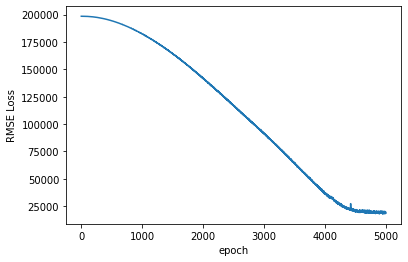

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [57]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [58]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [59]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output["Difference"]= final_output['Test']-final_output['Prediction']
final_output.max()

Test          745000.000000
Prediction    657455.562500
Difference    520907.328125
dtype: float64